Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

---
- [ ] My target is gold price. I will predict the "High" column in my tabular gold.csv dataset from Yahoo.com. I will also consider engineering an "Average" column for average price between "High" and "Low".
- [ ] My problem is price prediction, using regression.
- [ ] How is my target distributed?
    - Regression: Is the target right-skewed? (No). If so, you may want to log transform the target. (It's a normal distribution.)
- [ ] My evaluation metric(s).
    - Regression: **mean absolute error** (consider root mean squared error, R^2, or other regression metrics)
- [ ] Observations used to train, validate, and test the model(s): Train/Val/Test split FIRST to avoid data leakage, use time-based split or split by row numbers. Then, wrangle function to make new 'Average' price column, and drop date column.
    - Are some observations outliers? (No) Will you exclude them? (N/A)
    - Will I do a random split? NO (data leakage!)
- [ ] Clean and explore data: The gold.csv data is clean, as historical financial CSV data usually seems to be (in my short experience). I imported the data from Yahoo via the URL so the data is more portable and current for any user of the notebook.
- [ ] Features, if any, to exclude: Would some features "leak" future information? : Exclude 'Date" column to avoid data leakage of future information.

In [5]:
# https://lambdaschool.github.io/ds/unit2/portfolio-project/ds14
# https://finance.yahoo.com/quote/GOLD/history?p=GOLD (Gold)
# GOLD (47B cap) has 15 more years of historical data than GLD, GDX, and GC=F

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

yahoo_gold_url = 'https://query1.finance.yahoo.com/v7/finance/download/GOLD?period1=476323200&period2=1587600000&interval=1d&events=history'

gold = pd.read_csv(yahoo_gold_url)

gold

# - [X] Continue to clean and explore your data. 
# - [X] For the evaluation metric you chose, what score would you get just by guessing? 
# - Test MAE: $2.613726621302543e-08 Linear Regression (best score of 4 models; LR, RFR, XGBr, SVM)
# - [X] Can you make a fast, first model that beats guessing? - Yes, Linear Regression

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-02-04,0.552300,0.581370,0.552300,0.552300,0.356190,50400
1,1985-02-05,0.552300,0.610440,0.552300,0.552300,0.356190,18400
2,1985-02-06,0.581370,0.654060,0.581370,0.581370,0.374938,65600
3,1985-02-07,0.581370,0.610440,0.581370,0.581370,0.374938,40000
4,1985-02-08,0.581370,0.610440,0.581370,0.581370,0.374938,25600
...,...,...,...,...,...,...,...
8871,2020-04-16,24.500000,25.110001,24.360001,25.000000,25.000000,19300400
8872,2020-04-17,23.440001,24.650000,23.150000,24.540001,24.540001,28513300
8873,2020-04-20,24.309999,25.469999,24.309999,24.920000,24.920000,18048000
8874,2020-04-21,24.100000,25.129999,24.049999,24.820000,24.820000,17345500


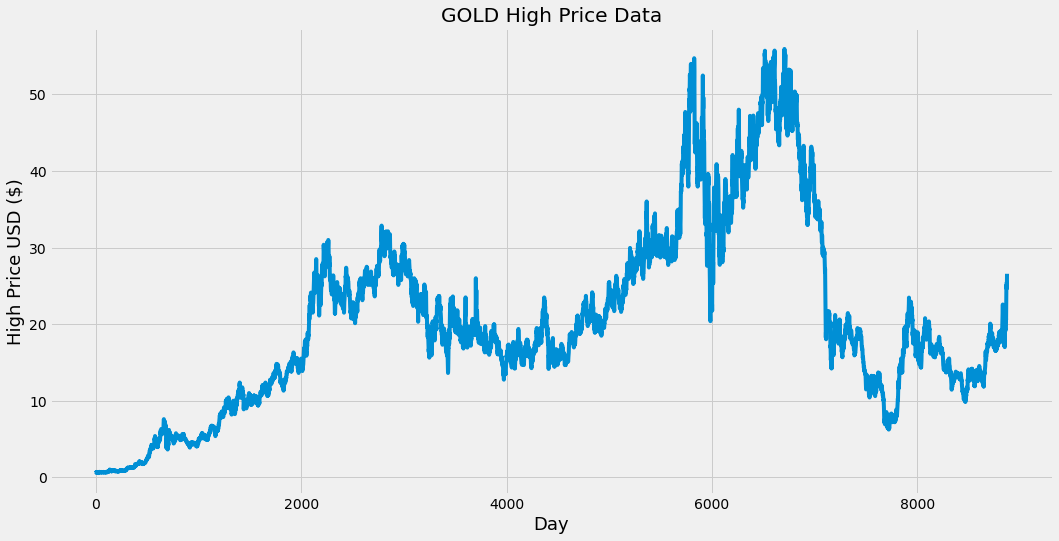

In [38]:
# Visualize the high price
plt.figure(figsize=(16,8))
plt.title('GOLD High Price Data')
plt.plot(gold['High'])
plt.xlabel('Day', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

In [0]:
# No NaNs
# gold.isna().sum()

In [8]:
# Calculations for train, val, test, sizes to do manual split and avoid data leakage
trainsize = .6*8876
valsize = .2*8876
testsize = .2*8876

(trainsize, valsize, testsize)

(5325.599999999999, 1775.2, 1775.2)

In [9]:
# Calculation for val rows
valend = 5325.599999999999 + 1775.2
valend

7100.799999999999

In [10]:
train = gold.iloc[0:5325]
val = gold.iloc[5326:7100]
test = gold.iloc[7101:8876]

(train.shape, val.shape, test.shape)

((5325, 7), (1774, 7), (1775, 7))

In [0]:
# train = gold

In [0]:
# Split train into train & test
# This method causes data leakage
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

#(train.shape, test.shape)

In [0]:
# Split train into train and val
# This method causes data leakage
#train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

#(train.shape, val.shape)

In [14]:
# Add New Column with Average Price
train['Average'] = (train['High'] + train['Low'])/2
val['Average'] = (val['High'] + val['Low'])/2
test['Average'] = (test['High'] + test['Low'])/2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
# Convert Date column to datetime format

#train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)
#val['Date'] = pd.to_datetime(val['Date'], infer_datetime_format=True)
#test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

# Commented out because it caused a slightly worse MAE score.

In [0]:
# Extract components from Date

#train['year'] = train['Date'].dt.year
#train['month'] = train['Date'].dt.month
#train['day'] = train['Date'].dt.day

#val['year'] = val['Date'].dt.year
#val['month'] = val['Date'].dt.month
#val['day'] = val['Date'].dt.day

#test['year'] = test['Date'].dt.year
#test['month'] = test['Date'].dt.month
#test['day'] = test['Date'].dt.day

# Commented out because it caused a slightly worse MAE score.

In [0]:
# Drop the original Date column
train = train.drop(columns=['Date'])
val = val.drop(columns=['Date'])
test = test.drop(columns=['Date'])

In [0]:
# Assign 'High' price to target variable
target = 'High'

In [0]:
# How is the target distributed?
y = train['High']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


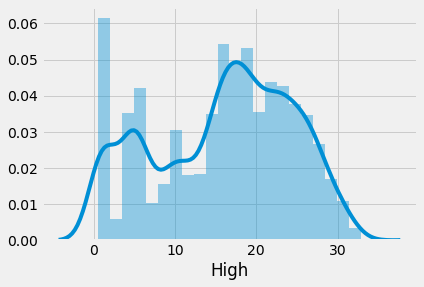

In [20]:
# Looks pretty normal
import seaborn as sns
sns.distplot(y);

In [21]:
# No outliers
y.describe()

count    5325.000000
mean       15.934572
std         8.482397
min         0.546875
25%         9.312500
50%        17.160000
75%        22.687500
max        32.875000
Name: High, dtype: float64

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [23]:
# Linear Regression Val
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    LinearRegression()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: ${mae:}')

Validation MAE: $1.5635010826794115e-08


In [24]:
# Linear Regression Test
X_test = test.drop(columns=target)
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:}')

Test MAE: $2.613726621302543e-08


In [25]:
# Random Forest Regressor Val
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: ${mae:}')

Validation MAE: $7.682456119692205


In [26]:
# Random Forest Regressor Test
X_test = test.drop(columns=target)
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:}')

Test MAE: $0.08054531162478673


In [27]:
# XGBRegressor Val
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    XGBRegressor()
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: ${mae:}')

[04:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation MAE: $7.657584505356162


In [28]:
# XGBRegressor Test
X_test = test.drop(columns=target)
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:}')

Test MAE: $0.2705279356651113


In [29]:
# Support Vector Regression (SVM) Val
# https://stats.stackexchange.com/questions/82923/mixing-continuous-and-binary-data-with-linear-svm
# All features should be scaled or normalised for SVM
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: ${mae:}')

Validation MAE: $16.897588250595163


In [30]:
# Support Vector Regression (SVM) Test
# All features should be scaled or normalised for SVM
X_test = test.drop(columns=target)
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:}')

Test MAE: $3.068947422394334


In [0]:
# Prepare data for LSTM model
from sklearn.preprocessing import MinMaxScaler 


In [32]:
# Build LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Using TensorFlow backend.


In [0]:
# Compile the model
model.compile(optimizer='adam', loss = 'mean_absolute_error')

In [0]:
# Train the model
# model.fit(X_train, y_train, batch_size=1, epochs=1)

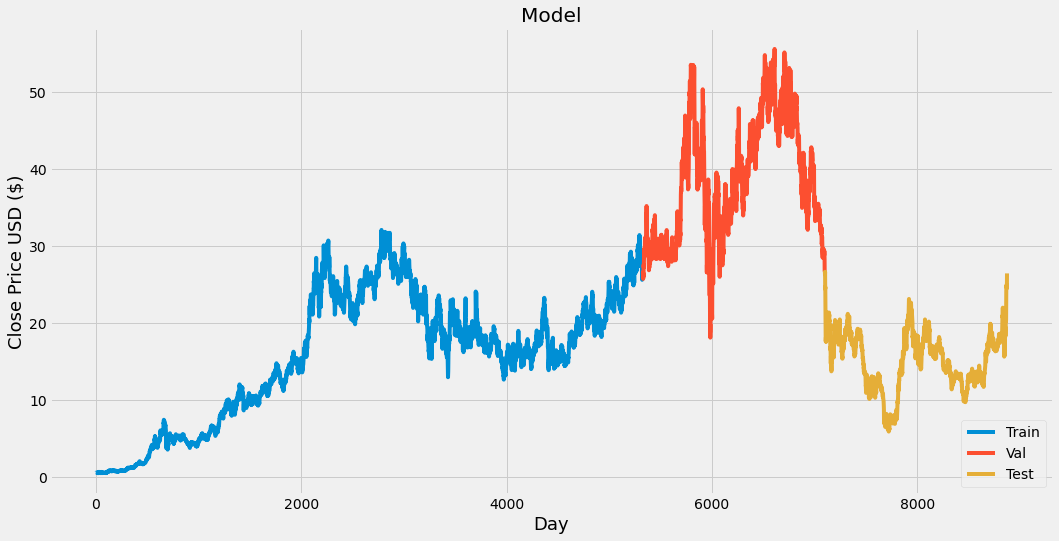

In [39]:
# Plot the data
train = gold.iloc[0:5325]
val = gold.iloc[5326:7100]
test = gold.iloc[7101:8876] 
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Day', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(val['Close'])
plt.plot(test['Close'])
### plt.plot(gold) trying to compare
plt.legend(['Train', 'Val', 'Test'], loc = 'lower right')
plt.show()